# Dubin's Car - Analytic Solutions

* Rotation Matrix: counter-clockwise $\theta$
$$
\bigg[
\begin{array}[cc]
    .\cos \theta & - \sin \theta \\
    \sin \theta & \cos \theta
\end{array}
\bigg]
$$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def plot_half_circle(x, y, r, ax, c='b', lw=2, orientation=0):
    xtilde = x*np.cos(orientation) - y*np.sin(orientation)
    ytilde = y*np.cos(orientation) + x*np.sin(orientation)
    #print(xtilde, ytilde)
    
    theta = np.linspace(-np.pi/2+orientation, np.pi/2+orientation, 100)
    xs = xtilde + r * np.cos(theta)
    ys = ytilde + r * np.sin(theta)
    
    #ax.plot(xtilde, ytilde, c=c, lw=lw)
    ax.plot(xs, ys, c=c, lw=lw)
    
def plot_circle(x, y, r, ax, c='b', lw=5, orientation=0):
    xtilde = x*np.cos(orientation) - y*np.sin(orientation)
    ytilde = y*np.cos(orientation) + x*np.sin(orientation)
    
    theta = np.linspace(0, 2*np.pi, 200)
    xs = xtilde + r * np.cos(theta)
    ys = ytilde + r * np.sin(theta)
    ax.plot(xs, ys, c=c, lw=lw)

In [3]:
#== Color Param ==
brown = '#8B4513'
purple = '#9370DB'
tiffany = '#0abab5'
pink = '#FFB6C1'


## Outer Safe Set

In [4]:
def plot_outer_safety(R, R_turn, orientation, ax, axes):
    nx, ny = 300, 300
    xs = np.linspace(-R, R, nx)
    ys = np.linspace(-R, R, ny)
    #print(xs)
    v = np.full((nx, ny), fill_value=False)
    
    it = np.nditer(v, flags=['multi_index'])

    while not it.finished:
        idx = it.multi_index
        x = xs[idx[0]]
        y = ys[idx[1]]
        
        xtilde = x*np.cos(orientation) + y*np.sin(orientation)
        ytilde = y*np.cos(orientation) - x*np.sin(orientation)
        
        boolIn = (x**2 + y**2) <= R**2
        if np.abs(ytilde) > 2*R_turn-R:
            bool0 = ( xtilde <= np.sqrt( (R - R_turn)**2 - (R_turn - np.abs(ytilde))**2 ) )
        else:
            bool0 = False
        if np.abs(ytilde) <= 2*R_turn-R:
            bool1 = xtilde <= -1 * np.sqrt( (3*R_turn-R)**2 - (R_turn + np.abs(ytilde))**2 )
        else:
            bool1 = False

        v[idx] = (bool0 or bool1)and boolIn
        it.iternext()
    ax.imshow(v.T, interpolation='none', extent=axes, origin="lower", cmap="plasma", vmin=0)    
    

In [5]:
R = 1.
print('We require R_turn >= {:.1f}'.format(R/2))
R_turn = .6

print('If (R, R_turn) = ({:.1f}, {:.1f}), then we want r < {:.1f}'.format(R, R_turn, 2*R_turn-R))
r = .5
xc, yc = 0., 0. 

We require R_turn >= 0.5
If (R, R_turn) = (1.0, 0.6), then we want r < 0.2


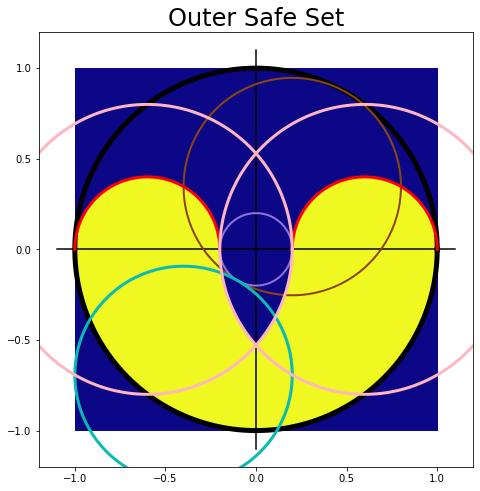

In [6]:
orientation = np.pi/2
axes_scaling = 1.2

fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.plot([xc, xc], [-1.1*R, 1.1*R], c='k')
ax.plot([-1.1*R, 1.1*R], [yc, yc], c='k')

plot_circle(0., 0., R, ax, c='k')
plot_circle(0., 0., 2*R_turn-R, ax, c='g', lw=1)

#== outer safe set ==

#1
plot_circle(0., R-R_turn, R_turn, ax, c=brown, lw=2, orientation=11*np.pi/6)
plot_half_circle(0., R_turn, R-R_turn, ax, c='r', lw=3, orientation=orientation)
plot_half_circle(0., -R_turn, R-R_turn, ax, c='r', lw=3, orientation=orientation)

#2
plot_circle(0., 0., 2*R_turn-R, ax, c=purple, lw=2)
plot_circle(0., -(3*R_turn-R), R_turn, ax, c=tiffany, lw=3, orientation=11*np.pi/6)
plot_circle(0., R_turn, 3*R_turn-R, ax, c=pink, lw=3, orientation=orientation)
plot_circle(0., -R_turn, 3*R_turn-R, ax, c=pink, lw=3, orientation=orientation)

#3
plot_outer_safety(R, R_turn, orientation, ax, [-1.*R, 1.*R, -1.*R, 1.*R])

axes = axes_scaling*np.array([-R, R, -R, R])
ax.axis(axes)
ax.set_title('Outer Safe Set', fontsize=24)
plt.show()

### $r > 2 R_{turn}-R$

We require R_turn >= 0.5
If (R, R_turn) = (1.0, 0.6), then we want r > 0.2
we select r = 0.3


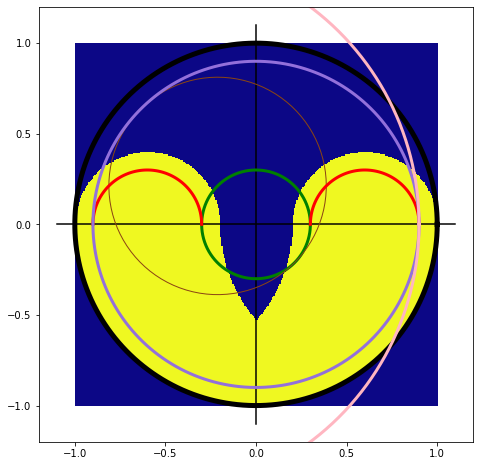

In [7]:
orientation = np.pi/2
axes_scaling = 1.2

R = 1
print('We require R_turn >= {:.1f}'.format(R/2))
R_turn =.6

print('If (R, R_turn) = ({:.1f}, {:.1f}), then we want r > {:.1f}'.format(R, R_turn, 2*R_turn-R))
r = .3
print('we select r = {:.1f}'.format(r))

fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.plot([xc, xc], [-1.1*R, 1.1*R], c='k')
ax.plot([-1.1*R, 1.1*R], [yc, yc], c='k')
plot_circle(0., 0., R, ax, c='k', orientation=orientation)
plot_circle(0., 0., r, ax, c='g', lw=3, orientation=orientation)
plot_outer_safety(R, R_turn, orientation, ax, [-1.*R, 1.*R, -1.*R, 1.*R])

#== Reach-Avoid Set ==
#1
plot_circle(0., R_turn-r, R_turn, ax, c=brown, lw=1, orientation=np.pi/4)
plot_half_circle(0., -R_turn, R_turn-r, ax, c='r', lw=3, orientation=orientation)
plot_half_circle(0., R_turn, R_turn-r, ax, c='r', lw=3, orientation=orientation)

#2
plot_circle(0., 0, 2*R_turn-r, ax, c=purple, lw=3, orientation=orientation)
plot_circle(0., R_turn, 3*R_turn-r, ax, c=pink, lw=3, orientation=orientation)

#3

axes = axes_scaling*np.array([-R, R, -R, R])
ax.axis(axes)
plt.show()

### $r < 2 R_{turn}-R$

We require R_turn >= 0.5
If (R, R_turn) = (1.0, 0.7), then we want r < 0.4
we select r = 0.2


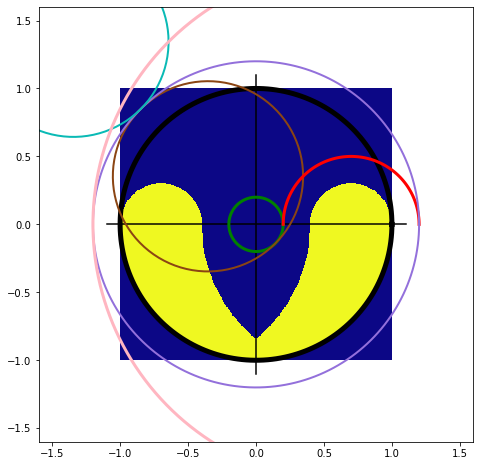

In [8]:
orientation = np.pi/2
axes_scaling = 1.6

R = 1
print('We require R_turn >= {:.1f}'.format(R/2))
R_turn =.7

print('If (R, R_turn) = ({:.1f}, {:.1f}), then we want r < {:.1f}'.format(R, R_turn, 2*R_turn-R))
r = .2
print('we select r = {:.1f}'.format(r))

fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.plot([xc, xc], [-1.1*R, 1.1*R], c='k')
ax.plot([-1.1*R, 1.1*R], [yc, yc], c='k')
plot_circle(0., 0., R, ax, c='k', orientation=orientation)
plot_circle(0., 0., r, ax, c='g', lw=3, orientation=orientation)
plot_outer_safety(R, R_turn, orientation, ax, [-1.*R, 1.*R, -1.*R, 1.*R])

#== Reach-Avoid Set ==
#1
plot_circle(0., R_turn-r, R_turn, ax, c=brown, lw=2, orientation=np.pi/4)
plot_half_circle(0., -R_turn, R_turn-r, ax, c='r', lw=3, orientation=orientation)
#plot_half_circle(0., R_turn, R_turn-r, ax, c='r', lw=3, orientation=orientation)

#2
plot_circle(0., 0, 2*R_turn-r, ax, c=purple, lw=2, orientation=orientation)
plot_circle(0., 3*R_turn-r, R_turn, ax, c=tiffany, lw=2, orientation=np.pi/4)
plot_circle(0., -R_turn, 3*R_turn-r, ax, c=pink, lw=3, orientation=orientation)

#3

axes = axes_scaling*np.array([-R, R, -R, R])
ax.axis(axes)
plt.show()